### DAT405 Assignment 2 – Group 53
### Venkata Sai Dinesh Uddagiri - (10 hrs)
### Mudhumitha Venkatesan (10 hrs)


# Problem 1

a. Find a linear regression model that relates the living area to the selling price. 
If you did any data cleaning step(s), describe and explain why you did that. 

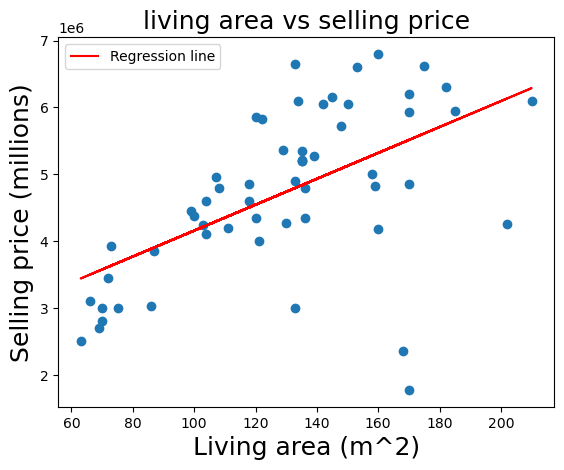

In [1]:
import pandas as pnd
#Import matplotlib to plot the linear regression model
import matplotlib.pyplot as plt
#Import LinearRegression model
from sklearn.linear_model import LinearRegression
#Reading csv file in to data frame
livingArea_sellingPrice_raw=pnd.read_csv("data_assignment2.csv")
#Checking for any neagtive or zero values in Living_area and Selling_Price coloumns
livingArea_sellingPrice=(livingArea_sellingPrice_raw[(livingArea_sellingPrice_raw['Living_area'] > 0)&(livingArea_sellingPrice_raw['Selling_price'] >= 0)]).dropna(subset=['Living_area','Selling_price'])
x_living_area=livingArea_sellingPrice['Living_area'].values.reshape(-1,1)
y_selling_price=livingArea_sellingPrice['Selling_price'].values.reshape(-1,1)
#Generating a linear regression model
model=LinearRegression().fit(x_living_area,y_selling_price)
#Plot the Scatter plot between Living_area and Selling_price
plt.scatter(x_living_area,y_selling_price)
#Plot Linear regression line
plt.plot(x_living_area,model.predict(x_living_area),c='r',label='Regression line')
#Declare labels and titles for the plot 
plt.title("living area vs selling price", fontsize = 18)
plt.xlabel("Living area (m^2)", fontsize = 18)
plt.ylabel("Selling price (millions)", fontsize = 18)
plt.legend()
plt.show()

In [2]:
livingArea_sellingPrice_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             56 non-null     int64  
 1   Living_area    56 non-null     int64  
 2   Rooms          54 non-null     float64
 3   Land_size      55 non-null     float64
 4   Biarea         32 non-null     float64
 5   Age            56 non-null     int64  
 6   Selling_price  56 non-null     int64  
dtypes: float64(3), int64(4)
memory usage: 3.2 KB


b. What are the values of the slope and intercept of the regression line?

In [3]:
#Slope of Linear regression
print("Slope of Linear regression line: ", model.coef_ )
#Intercept of Linear regression
print("Intercept of Linear regression line: ", model.intercept_)

Slope of Linear regression line:  [[19370.13854733]]
Intercept of Linear regression line:  [2220603.24335587]


c. Use this model to predict the selling prices of houses which have living area 100 m2, 150 m2 and 200 m2.

In [4]:
import numpy as np
living_areas=np.array([100, 150, 200]).reshape(-1,1)
# Selling price predection for given living areas
predicted_selling_price=model.predict(living_areas)
print("Predicted selling price of house with living area 100 m2 is", float(predicted_selling_price[0]))
print("Predicted selling price of house with living area 150 m2 is", float(predicted_selling_price[1]))
print("Predicted selling price of house with living area 200 m2 is", float(predicted_selling_price[2]))

Predicted selling price of house with living area 100 m2 is 4157617.0980890268
Predicted selling price of house with living area 150 m2 is 5126124.025455605
Predicted selling price of house with living area 200 m2 is 6094630.952822184


d. Draw a residual plot.

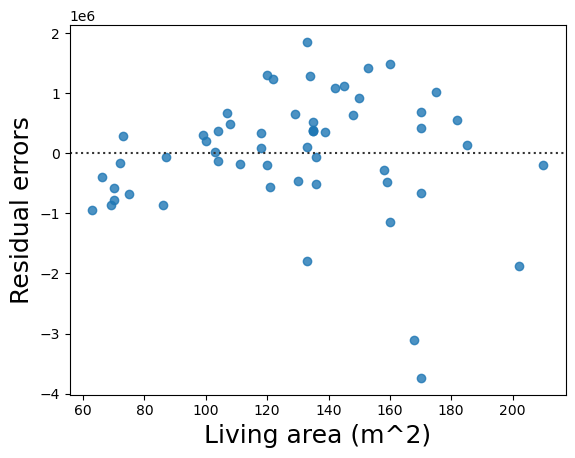

In [8]:
import seaborn as sns
#Creation of the Residual plot for Linear regression model
sns.residplot(x = x_living_area , y = y_selling_price, data = livingArea_sellingPrice)
plt.xlabel("Living area (m^2)", fontsize = 18)
plt.ylabel("Residual errors", fontsize = 18)
plt.show()

# Problem 2

a. Use a confusion matrix to evaluate the use of logistic regression to classify the 
iris data set.


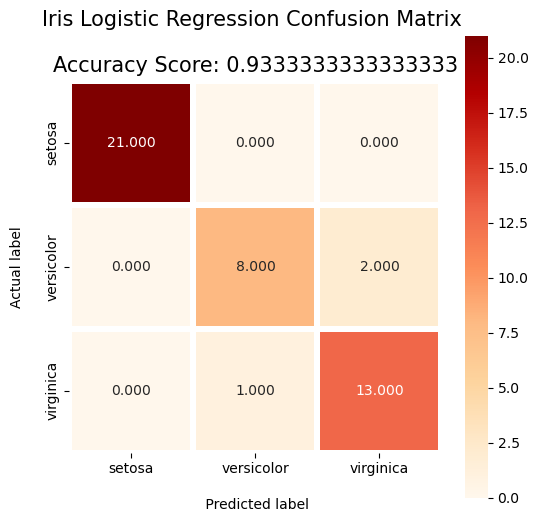

In [9]:
#To get access to a iris dataset
from sklearn.datasets import load_iris
#Import train_test_split function
from sklearn.model_selection import train_test_split
#Import LogisticRegression model
from sklearn.linear_model import LogisticRegression
#Import Confusion matrix
from sklearn.metrics import confusion_matrix
#Import matplotlib to plot the confusion matrix
import matplotlib.pyplot as plt
#Import seaborn package for adding additional graphics to plot
import seaborn as sns
#Loading iris dataset
iris_dataSet=load_iris()
#Splitting data in to test and train sets
x_train, x_test, y_train, y_test = train_test_split(iris_dataSet.data, iris_dataSet.target, test_size=0.3, random_state=4)
#Create instance of model
iris_logisticRegr = LogisticRegression(multi_class='ovr', solver='liblinear')
#Train the Logistic Regression
iris_logisticRegr.fit(x_train, y_train)
#Predict the values for x_test set
test_predictions = iris_logisticRegr.predict(x_test)
#Evaluate the accuracy score of Logistic Regression
score = iris_logisticRegr.score(x_test, y_test)
#Create the confusion matrices betweeen original value and pridected valuee of x_test
iris_logistic_regression_cm = confusion_matrix(y_test, test_predictions)
#size of the figure
plt.figure(figsize=(6,6))
#Obtaining plot of confusion matrix using sns
sns.heatmap(iris_logistic_regression_cm, annot=True, fmt=".3f", linewidths=3, square = True, xticklabels=iris_dataSet.target_names, yticklabels=iris_dataSet.target_names, cmap = 'OrRd');
# Declaring labels and title for confusion matrix
plt.ylabel('Actual label\n');
plt.xlabel('\n Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title("Iris Logistic Regression Confusion Matrix \n\n"+all_sample_title, size = 15);
plt.show()

In [10]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

b. Use k-nearest neighbours to classify the iris data set with some different 
values for k, and with uniform and distance-based weights. What will happen 
when k grows larger for the different cases? Why?

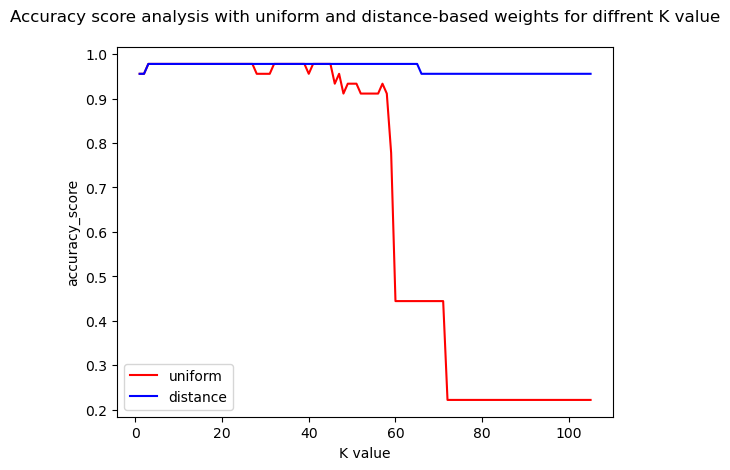

In [12]:
#To get access to a iris dataset
from sklearn.datasets import load_iris
#Import train_test_split function
from sklearn.model_selection import train_test_split
#Import KNeighborsClassifier model
from sklearn.neighbors import KNeighborsClassifier
#Import Confusion matrix
from sklearn.metrics import confusion_matrix
#Import matplotlib to plot the confusion matrix
from sklearn import metrics
import matplotlib.pyplot as plt
#Import seaborn package for adding additional graphics to plot
import seaborn as sns
#Loading iris dataset
iris_dataSet=load_iris()
test_value=0.3
#Splitting data in to test and train sets
x_train, x_test, y_train, y_test = train_test_split(iris_dataSet.data, iris_dataSet.target, test_size=test_value, random_state=4)
#Calculating maximum K value - length of data set excluding test data set
max_kValue=int(iris_dataSet.data.shape[0] - iris_dataSet.data.shape[0]*test_value)
#List of weights of k nearest neighbour
weights = ['uniform' , 'distance']
#List intializations to append accuracy score for different k values for different weights
distance_accuracy_list=[]
unifrom_accuracy_list=[]
for weight in weights:
    for k in range(1,max_kValue+1):
        #Create instance of k nearest neighbor model
        knn = KNeighborsClassifier(n_neighbors=k, weights=weight)
        #Train k nearest neighbor model
        knn.fit(x_train, y_train)
        #Predict the values for x_test set using k nearest neighbor model
        test_predictions = knn.predict(x_test)
        if weight=='uniform':
            #Evaluate the accuracy score for each value of k and adding data to list
            unifrom_accuracy_list.append(metrics.accuracy_score(y_test, test_predictions))
        else:
            #Evaluate the accuracy score for each value of k and ading data to list
            distance_accuracy_list.append(metrics.accuracy_score(y_test, test_predictions))
#Create Plot of k-nearest neighbours with uniform weights
plt.plot(list(range(1,max_kValue+1)),unifrom_accuracy_list, color = 'red')
#Create Plot of k-nearest neighbours with distance weights
plt.plot(list(range(1,max_kValue+1)),distance_accuracy_list, color = 'blue')   
# Declaring labels and title for plot
plt.legend(weights, loc = "lower left")
plt.xlabel('K value')
plt.ylabel('accuracy_score')
plt.title('Accuracy score analysis with uniform and distance-based weights for diffrent K value\n')
plt.show()

c. Compare the classification models for the iris data set that are generated by 
k-nearest neighbours (for the different settings from question 3) and by 
logistic regression. Calculate confusion matrices for these models and discuss 
the performance of the various models.

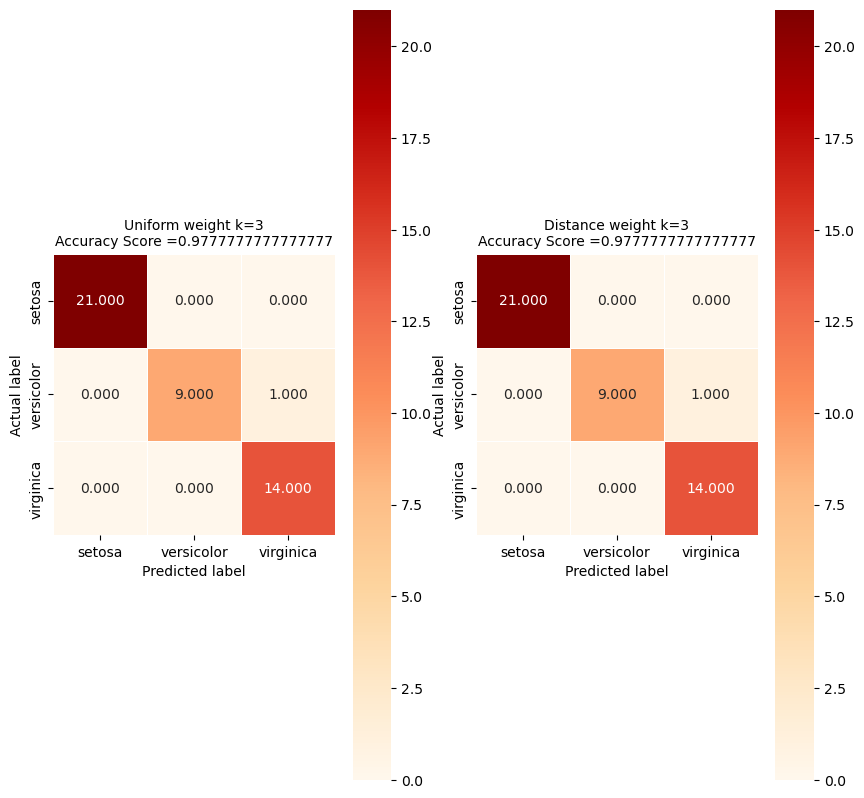

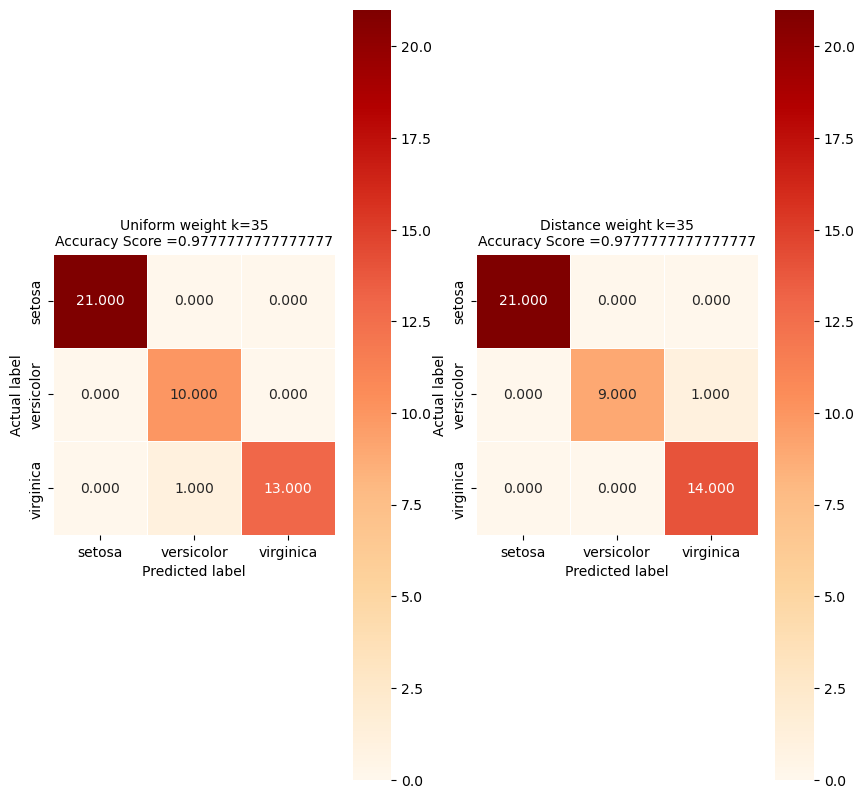

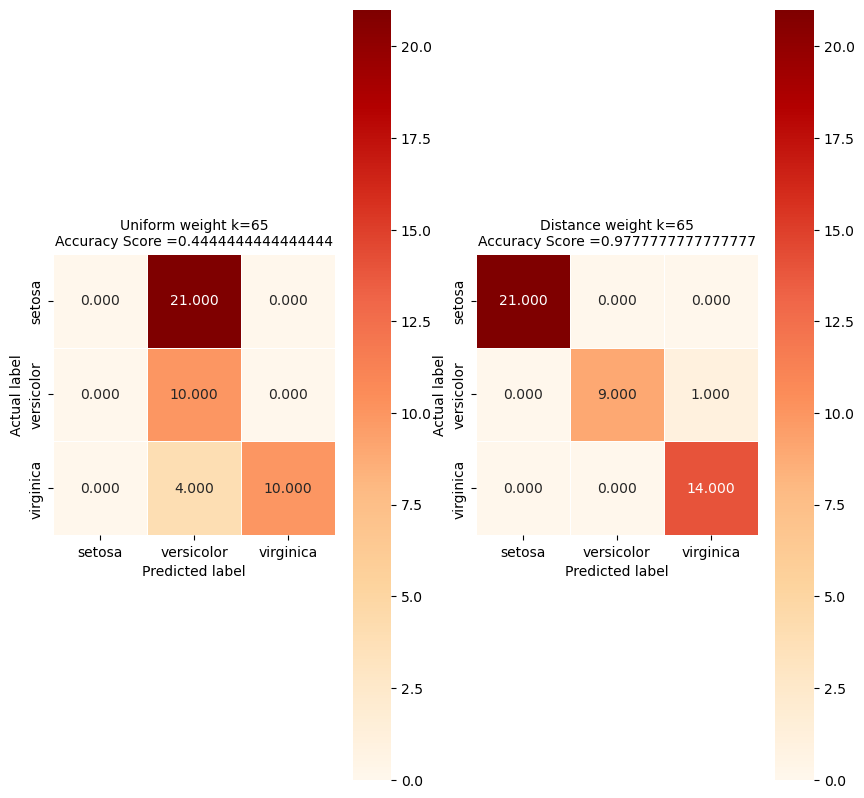

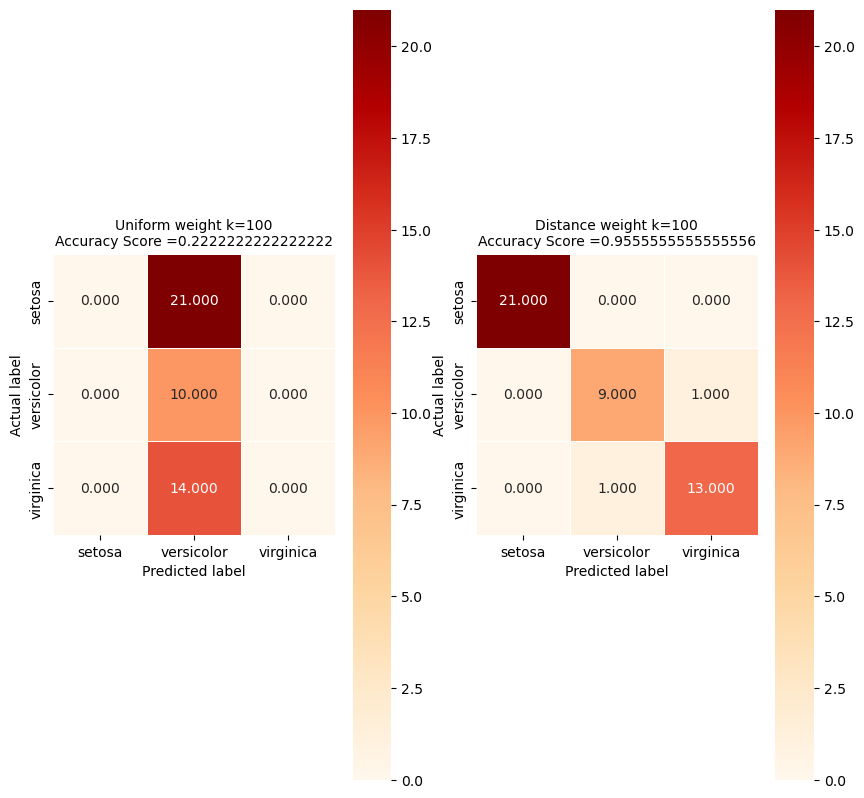

In [13]:
#To get access to a iris dataset
from sklearn.datasets import load_iris
#Import train_test_split function
from sklearn.model_selection import train_test_split
#Import KNeighborsClassifier model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Import Confusion matrix
from sklearn.metrics import confusion_matrix
#Import matplotlib to plot the confusion matrix
import matplotlib.pyplot as plt
#Import seaborn package for adding additional graphics to plot
import seaborn as sns
#Loading iris dataset
iris_dataSet=load_iris()
#Splitting data in to test and train sets
x_train, x_test, y_train, y_test = train_test_split(iris_dataSet.data, iris_dataSet.target, test_size=0.3, random_state=4)
#K values list to obtain confusion matrices
kValue=[3 , 35, 65, 100]
#List of weights of k nearest neighbour
weights = ['distance','uniform']
#List intializations to append test predections for different k values for different weights
distance_test_predictions=[]
uniform_test_predictions=[]
for weight in weights:
    for i in range(len(kValue)):
        #Create instance of k nearest neighbor model
        knn = KNeighborsClassifier(n_neighbors=kValue[i], weights=weight)
         #Train k nearest neighbor model
        knn.fit(x_train, y_train)
        #Predict the values for x_test set using k nearest neighbor model
        test_predictions = knn.predict(x_test)
        if weight=='uniform':
            #Evaluate the predicted value of x_test using k nearest neighbor uniform weight model
            uniform_test_predictions.append(test_predictions)
        else:
            #Evaluate the predicted value of x_test using k nearest neighbor distance weight model
            distance_test_predictions.append(test_predictions)
for i in range(len(kValue)):
    #plot confusion matrices for different k values
    fig, ((ax1, ax2)) = plt.subplots(1, 2,figsize=(10,10))
    cm_uniform = metrics.confusion_matrix(y_test, uniform_test_predictions[i])
    #Obtaining plot of confusion matrix for k nearest neighbor uniform weight model using sns
    sns.heatmap(cm_uniform, ax = ax1, annot=True, fmt=".3f", linewidths=.5, square = True, xticklabels=iris_dataSet.target_names, yticklabels=iris_dataSet.target_names, cmap = 'OrRd')
    cm_distance = metrics.confusion_matrix(y_test, distance_test_predictions[i])
    #Obtaining plot of confusion matrix for k nearest neighbor uniform distance model using sns
    sns.heatmap(cm_distance, ax = ax2, annot=True, fmt=".3f", linewidths=.5, square = True, xticklabels=iris_dataSet.target_names, yticklabels=iris_dataSet.target_names, cmap = 'OrRd')
    # Declaring labels and title for each subplot
    ax1.set_xlabel('Predicted label')
    ax1.set_ylabel('Actual label')
    ax1.set_title('Uniform weight k='+ str(kValue[i])+"\n" +'Accuracy Score ='+str(metrics.accuracy_score(y_test, uniform_test_predictions[i])), size=10)
    ax2.set_xlabel('Predicted label')
    ax2.set_ylabel('Actual label')
    ax2.set_title('Distance weight k='+ str(kValue[i])+"\n" +'Accuracy Score ='+str(metrics.accuracy_score(y_test, distance_test_predictions[i])), size=10)
    plt.show()